In this notebook, we go through various labeling methods for supervised training, especially classification.
The most typically used one is fixed time horizon labeling. Although it is easy to be used, an investor is not interesed in exactly fixed forwarded time return and it looses path dependent information.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Triple Barrier Method

Triple barrier method label whether price path within certain time frame reaches user defined thresholds.

The implementation will be found at finance_ml/labeling/barriers.py

# Trend Scanning Method

This method label the strength of trend through the following linear model

$$x_{t + l} = \beta_0 + \beta_1 l + \epsilon_{t + l} \forall l = 0, ..., L - 1$$
$$\hat{t}_{\hat{\beta}_1} = \frac{\hat{\beta}_1}{\hat{\sigma}_{\hat{\beta}_1}}$$
where L is an user-defined look forward period.  $|\hat{t}_{\hat{\beta}_1}|$ quantifies the strength of trend.

The implementation will be found at finance_ml/labeling/trend.py

2021-06-06 17:24:43.834376 100.0% _get_bins_from_trend done after 0.05 minutes. Remaining 0.0 minutes.


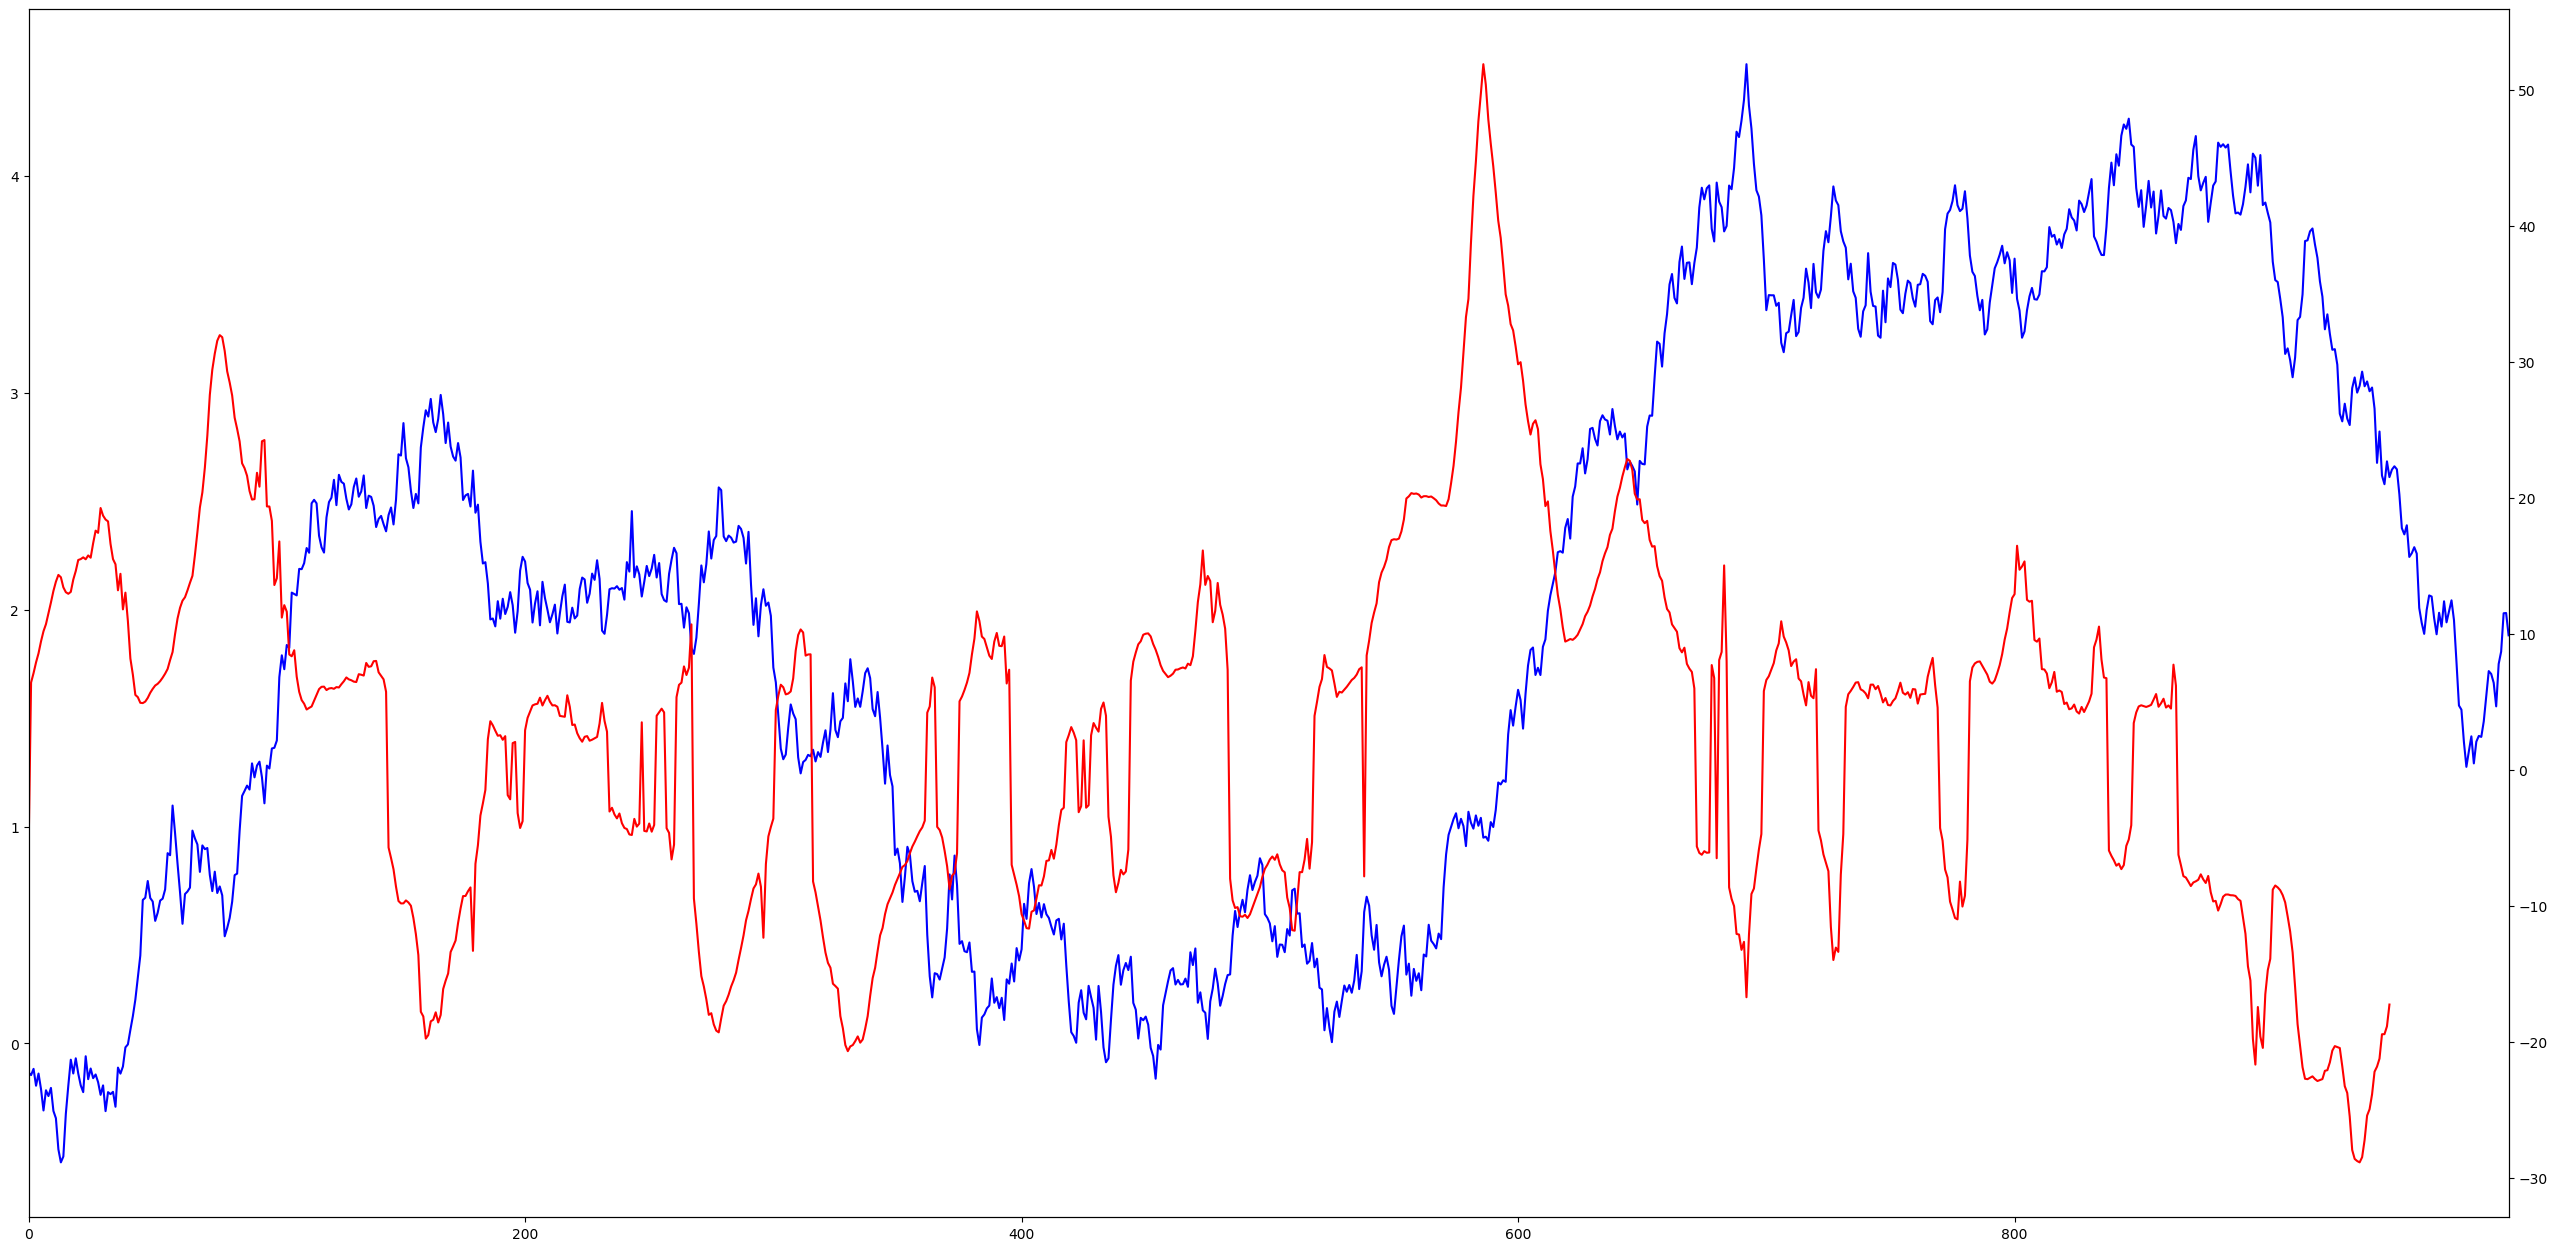

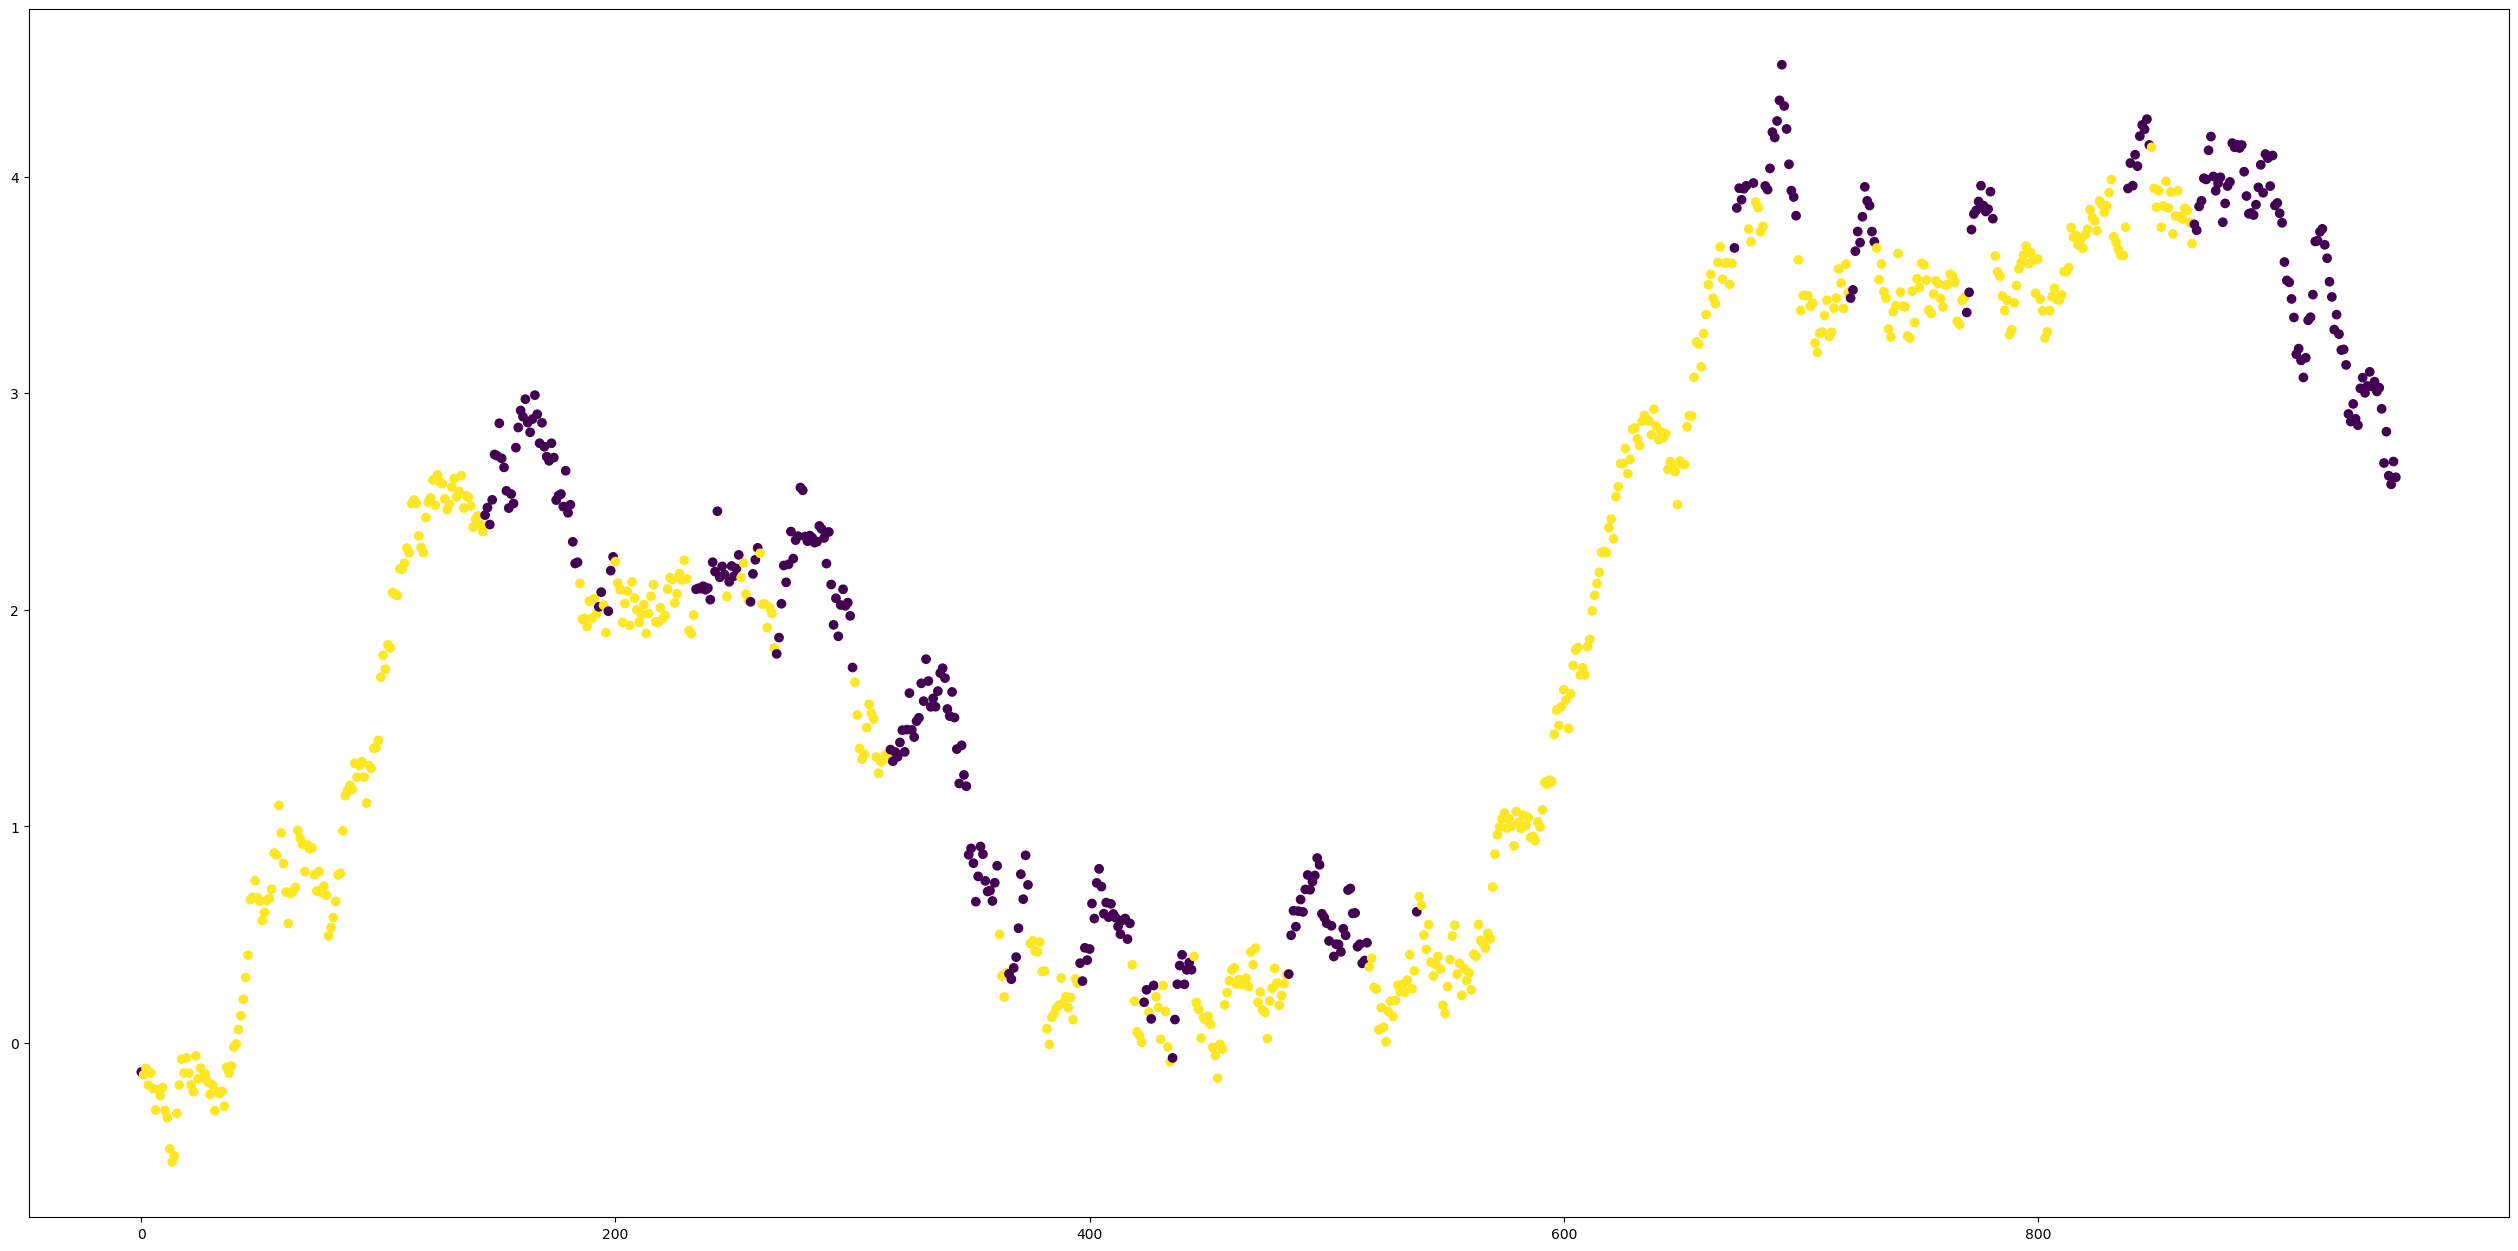

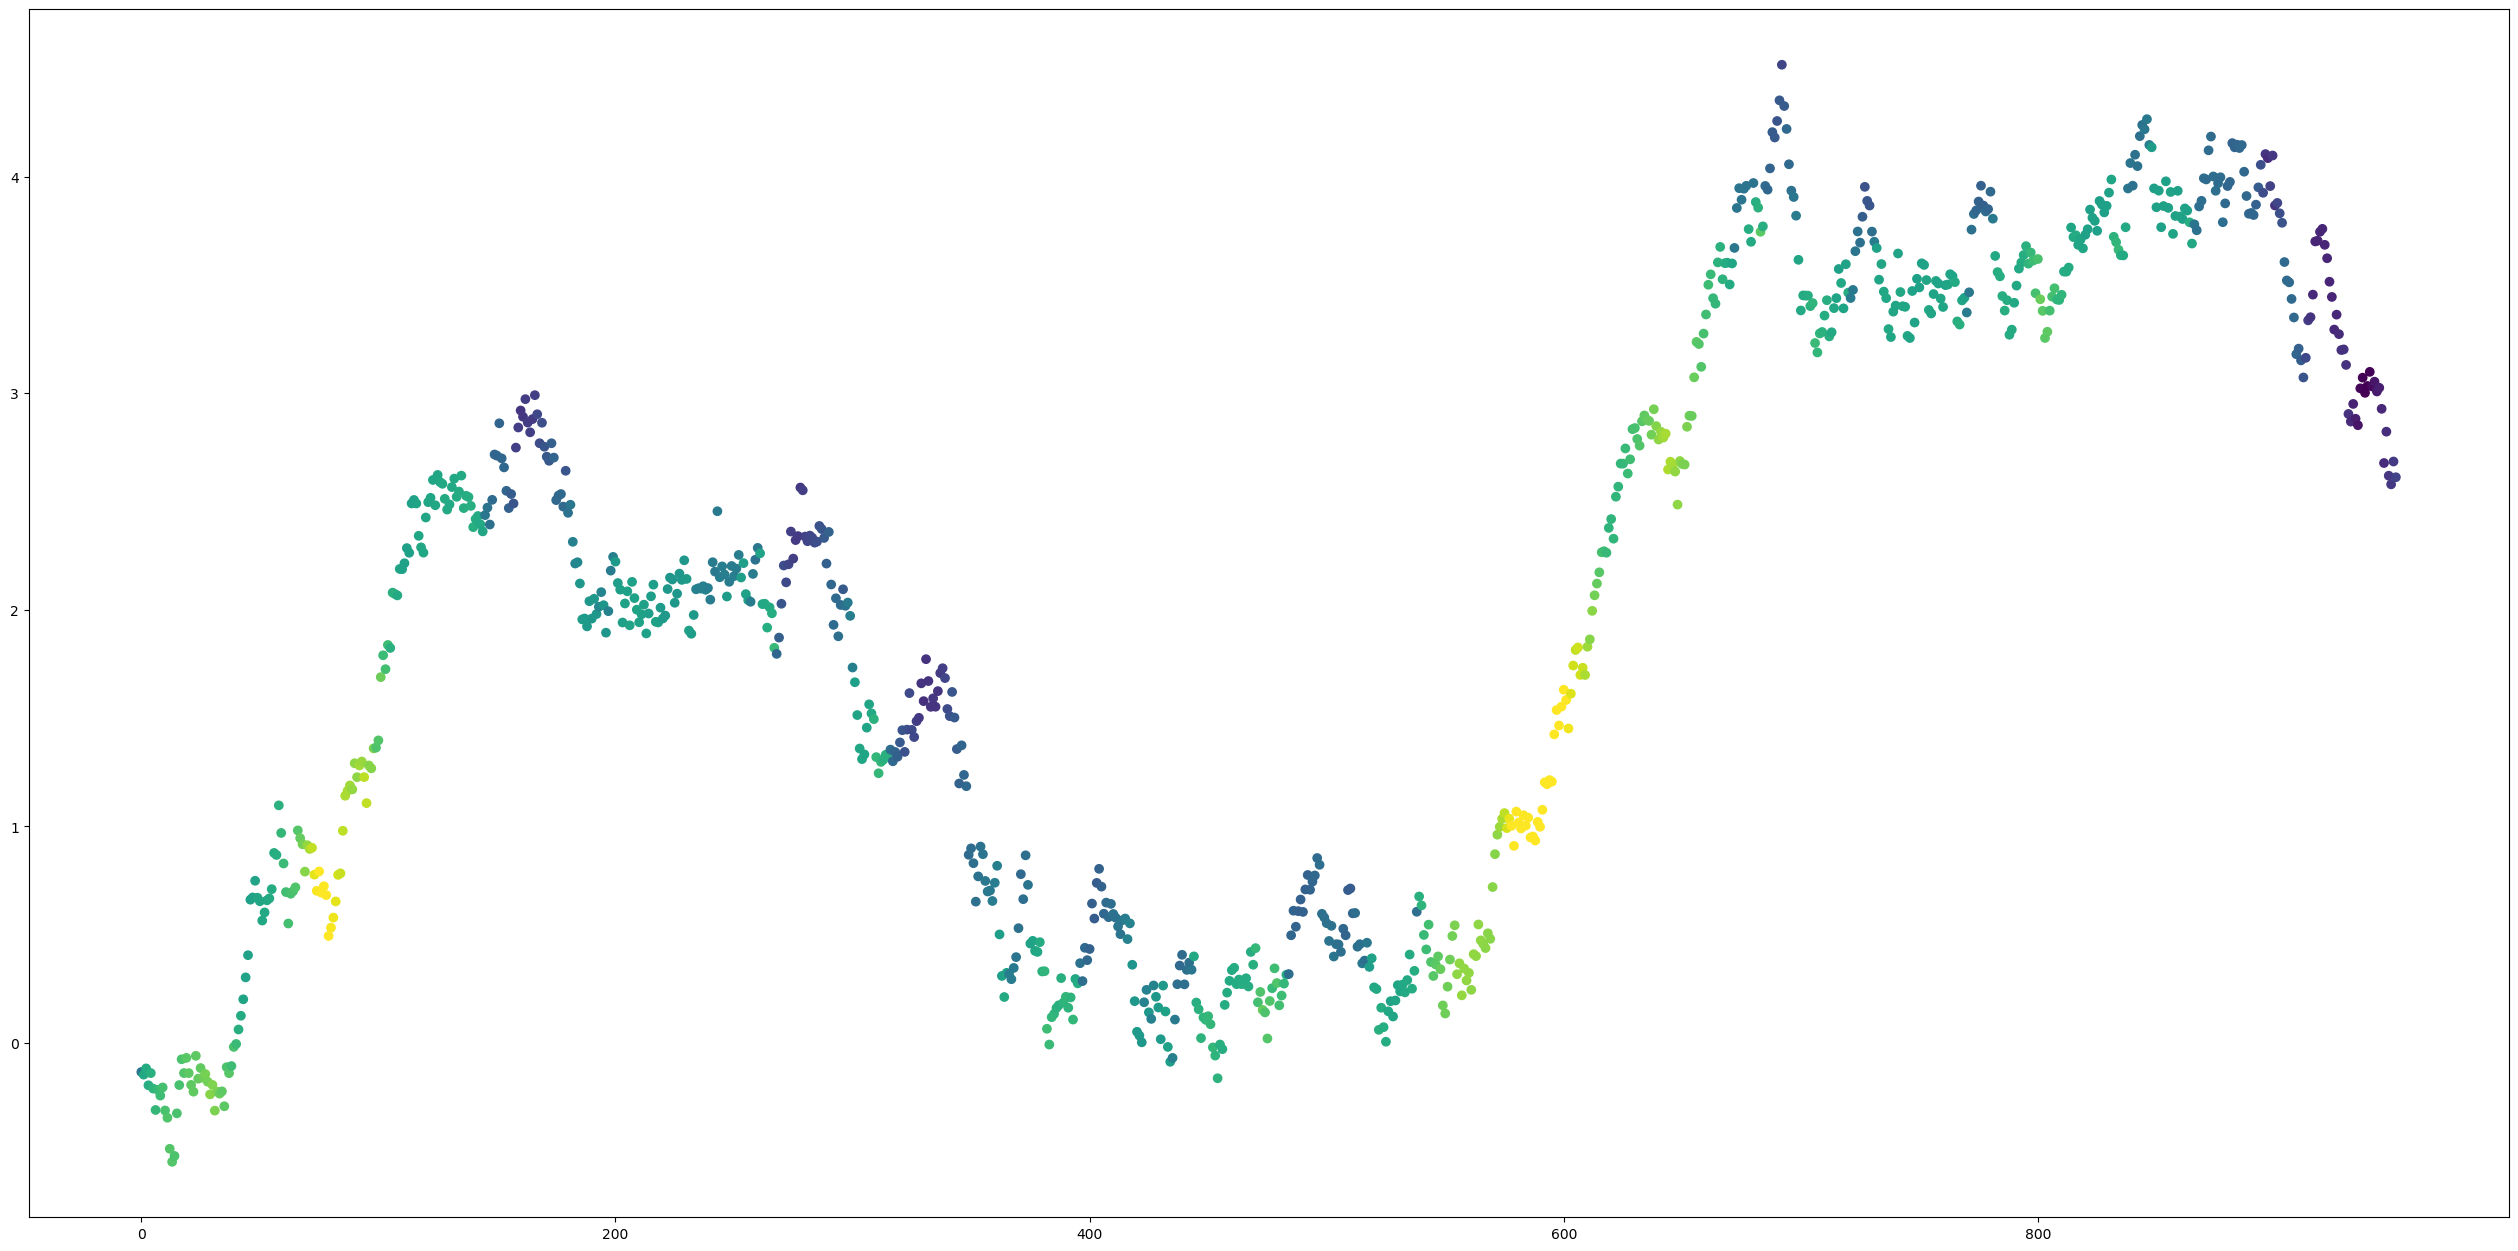

In [5]:
from finance_ml.labeling import get_bins_from_trend


df0 = pd.Series(np.random.normal(0, 0.1, 1000)).cumsum()
df0 += np.sin(np.linspace(0, 10, df0.shape[0]))
df1 = get_bins_from_trend(df0, [10, 50, 3], num_threads=4)
plt.figure()
df0.plot(color='b');
df1['t_val'].plot(secondary_y=True, color='r');
plt.figure()
plt.scatter(df1.index, df0.loc[df1.index].values, c=df1['bin'].values, cmap='viridis');
plt.figure()
t_vals = df1['t_val'].values
t_vals = np.clip(t_vals, -30.0, 30.0)
plt.scatter(df1.index, df0.loc[df1.index].values, c=t_vals, cmap='viridis');